In [49]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [50]:
TRAIN_DIR = "images/train"
TEST_DIR = "images/test"

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train = pd.DataFrame()
train["image"], train["label"] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test["image"], test["label"] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test["image"])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm
from PIL import Image

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [10]:
train_features = extract_features(train["image"])
test_features = extract_features(test["image"])

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [11]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
le.fit(train["label"])

LabelEncoder()

In [14]:
y_train = le.transform(train["label"])
y_test = le.transform(test["label"])

In [15]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [16]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation="softmax"))

c:\Users\iulia\camera\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation="softmax"))

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.fit(
    x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test)
)

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 126s 548ms/step - accuracy: 0.2377 - loss: 1.8348 - val_accuracy: 0.2583 - val_loss: 1.8088
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 122s 540ms/step - accuracy: 0.2516 - loss: 1.8035 - val_accuracy: 0.2457 - val_loss: 1.7892
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 112s 497ms/step - accuracy: 0.2723 - loss: 1.7497 - val_accuracy: 0.3702 - val_loss: 1.6388
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 111s 491ms/step - accuracy: 0.3529 - loss: 1.6298 - val_accuracy: 0.4147 - val_loss: 1.5139
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 113s 498ms/step - accuracy: 0.4063 - loss: 1.5267 - val_accuracy: 0.4673 - val_loss: 1.3708
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 115s 510ms/step - accuracy: 0.4412 - loss: 1.4448 - val_accuracy: 0.4888 - val_loss: 1.3280
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 115s 507ms/step - accuracy: 0.4607 - loss: 1.4122 - val_accuracy: 0.5126 - val_loss: 1.2750
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 113s 498ms/step - accuracy: 

In [23]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")

56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.5757 - loss: 1.1769
Loss: 1.0475726127624512
Accuracy: 63.46%


In [24]:
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [25]:
from keras.models import model_from_json

In [26]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [27]:
label = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [28]:
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [29]:
print(model.input_shape)

(None, 48, 48, 1)


In [30]:
image = "images/train/sad/42.jpg"
print("original image is of sad")
img = load_img(image, color_mode="grayscale", target_size=(48, 48))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is", pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
model prediction is sad


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def ef(image_path):
    # Încarcă imaginea și preprocesează
    img = load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img_array = img_to_array(img)  # Transformă imaginea într-un array
    img_array = img_array / 255.0  # Normalizează valorile pixelilor
    img_array = np.expand_dims(img_array, axis=0)  # Adaugă dimensiunea batch-ului
    return img_array

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  sad


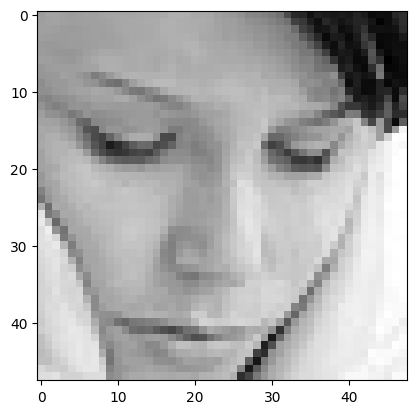

In [44]:
image = "images/train/sad/42.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap="gray")

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is  fear


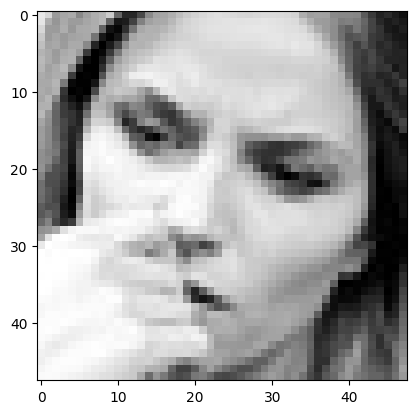

In [45]:
image = "images/train/fear/2.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap="gray")

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  disgust


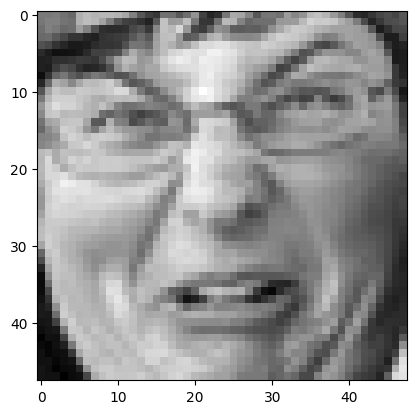

In [46]:
image = "images/train/disgust/299.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap="gray")

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  happy


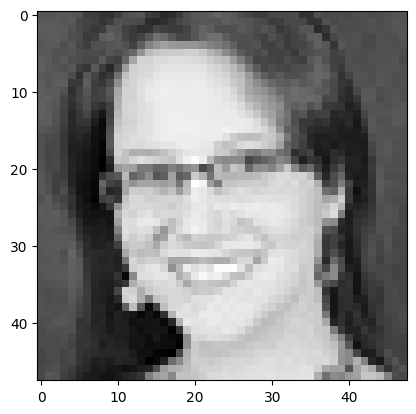

In [47]:
image = "images/train/happy/7.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap="gray")

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  surprise


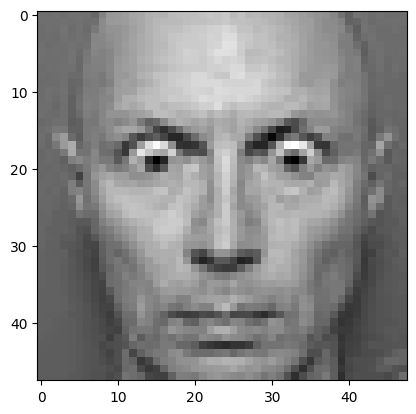

In [48]:
image = "images/train/surprise/15.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap="gray")